In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,NaN,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.7464
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,NaN
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,NaN,1.51870,2.53180,2.432800,1.8768
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,NaN,NaN,0.99942,3.65930,0.618250,3.2658
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.1884
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,NaN
796,3.466600,-4.03460,3.100400,NaN,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.2267
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.5853
798,NaN,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.1437


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	13
float64		column 3	13
float64		column 4	40
float64		column 5	13
float64		column 6	92
float64		column 7	39
float64		column 8	39
float64		column 9	39
float64		column 10	26
float64		column 11	53
float64		column 12	52


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,748.000000,787.000000,787.000000,760.000000,787.000000,708.000000,761.000000,761.000000,761.000000,774.000000,747.000000,748.000000
mean,1.482321,1.272861,1.976574,1.936324,1.996215,2.019809,1.959911,2.003886,1.996373,1.992699,1.978555,1.972001
std,2.715939,3.616982,1.144574,1.159518,1.165117,1.116654,1.167565,1.126200,1.129844,1.146786,1.166603,1.110298
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.018454,0.002484,0.002000,0.002088
25%,-0.412458,-0.694370,1.020150,0.930253,0.983370,1.079225,0.952390,1.006200,1.071100,1.043000,0.933815,1.031700
50%,0.888675,0.665580,1.968700,1.902350,2.035700,2.018000,1.951200,2.007400,1.974200,2.000450,1.991700,1.956850
75%,3.964950,4.474900,2.919200,2.929175,3.000100,2.962025,2.988900,2.923100,2.989100,2.977550,3.016700,2.860125
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

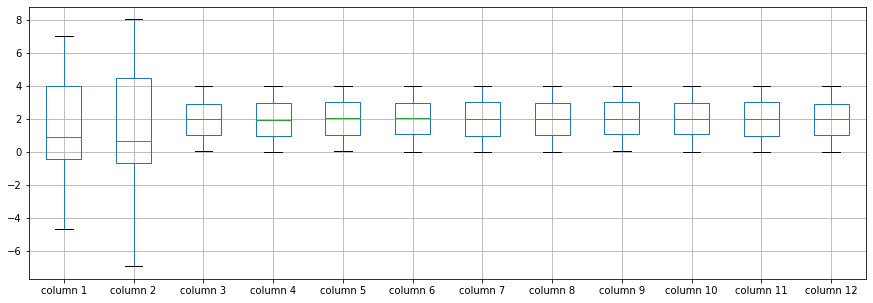

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.482321
column 2     1.272861
column 3     1.976574
column 4     1.936324
column 5     1.996215
column 6     2.019809
column 7     1.959911
column 8     2.003886
column 9     1.996373
column 10    1.992699
column 11    1.978555
column 12    1.972001
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.430313,-0.020833,0.003504,0.052505,0.026167,0.001113,0.024933,-0.015505,0.008114,0.021778,0.028713
column 2,-0.430313,1.000000,-0.017722,-0.033304,-0.028962,-0.029214,0.025786,-0.022132,-0.007841,-0.043214,-0.080965,0.002107
column 3,-0.020833,-0.017722,1.000000,-0.027253,0.085282,0.001136,0.048563,0.003248,0.002745,-0.013945,-0.023718,0.013511
column 4,0.003504,-0.033304,-0.027253,1.000000,-0.000084,-0.035109,0.027855,0.062563,-0.032183,0.036614,0.029802,-0.022997
column 5,0.052505,-0.028962,0.085282,-0.000084,1.000000,0.074775,0.040007,-0.021438,-0.011251,-0.007979,-0.023797,0.011870
column 6,0.026167,-0.029214,0.001136,-0.035109,0.074775,1.000000,-0.066037,0.024069,0.002476,0.019117,-0.003724,-0.007663
column 7,0.001113,0.025786,0.048563,0.027855,0.040007,-0.066037,1.000000,-0.019031,0.006386,-0.046299,-0.023465,-0.010792
column 8,0.024933,-0.022132,0.003248,0.062563,-0.021438,0.024069,-0.019031,1.000000,-0.048343,-0.053648,0.026879,-0.050446
column 9,-0.015505,-0.007841,0.002745,-0.032183,-0.011251,0.002476,0.006386,-0.048343,1.000000,0.048374,0.005797,-0.009548
column 10,0.008114,-0.043214,-0.013945,0.036614,-0.007979,0.019117,-0.046299,-0.053648,0.048374,1.000000,-0.071003,0.040303


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+59,12+59+59,12+59+59,12+59+59+59+59,12+59+59+59,12+59+59,12+59,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.117425422668457
Epoch: 1 , loss: 27.851594848632814
Epoch: 2 , loss: 26.874954719543457
Epoch: 3 , loss: 23.40377876281738
Epoch: 4 , loss: 22.149320945739746
Epoch: 5 , loss: 21.763449211120605
Epoch: 6 , loss: 21.209056663513184
Epoch: 7 , loss: 21.080896072387695
Epoch: 8 , loss: 20.7290442276001
Epoch: 9 , loss: 20.11918254852295
Epoch: 10 , loss: 19.997359313964843
Epoch: 11 , loss: 19.970230293273925
Epoch: 12 , loss: 19.82241874694824
Epoch: 13 , loss: 19.743863563537598
Epoch: 14 , loss: 19.37753227233887
Epoch: 15 , loss: 19.330069427490233
Epoch: 16 , loss: 19.29436038970947
Epoch: 17 , loss: 19.20189212799072
Epoch: 18 , loss: 19.09962127685547
Epoch: 19 , loss: 19.109221687316893
Epoch: 20 , loss: 18.902945747375487
Epoch: 21 , loss: 18.97556785583496
Epoch: 22 , loss: 18.866298332214356
Epoch: 23 , loss: 19.001544570922853
Epoch: 24 , loss: 18.934346084594726
Epoch: 25 , loss: 18.701893

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    1.786907
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,1.133279,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.660024
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.684584,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,-0.969545,0.459790,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.954287
796,0.000000,0.0,0.0,0.680486,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
797,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
798,-2.871604,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(42.14990487260296, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.16980728328730915

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.773089,0.16134,0.067351,3.533700,0.469590,0.679080,3.434400,2.792400,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.921600,0.424720,1.178500,1.680200,1.388800,3.21670,2.92360,0.772910,1.301474
2,-0.169460,0.50153,2.470900,3.065000,1.567600,1.482400,0.921600,1.957816,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.956300,2.787000,2.595700,1.923755,1.997290,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.631200,3.554100,2.271100,0.374250,2.178600,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.556120,0.070769,2.074700,0.803040,3.222900,3.49330,1.32550,3.231100,0.959675
796,3.466600,-4.03460,3.100400,2.026586,1.377300,2.288700,0.396130,2.396100,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.264600,3.341200,1.537000,1.225600,0.740270,2.49540,1.34330,1.622500,1.585300
798,0.569796,-5.21630,1.577000,1.844000,1.098700,3.424300,0.810810,3.727000,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NG_5(imp).xlsx", index=False, header=False)